# Métodos Numéricos 

**Nombre:** Luis Alexander Lema Delgado
**Materia:** Métodos Numéricos  
**Fecha:** 12/05/2025

### Polinomio de Taylor

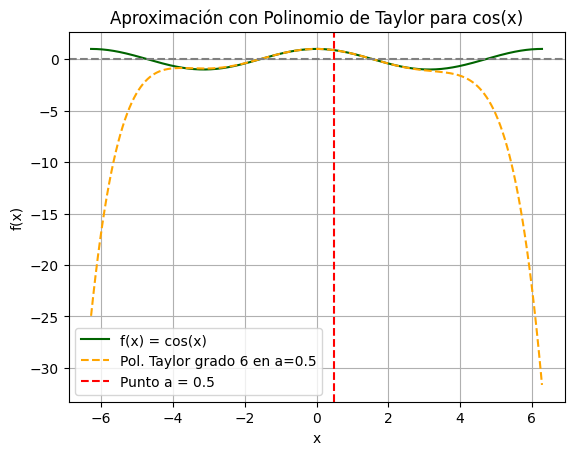

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def funcion_coseno(x):
    return np.cos(x)

def derivadas_coseno(orden, x):
    """
    Calcula la derivada n-ésima de cos(x) usando patrón repetitivo:
    cos, -sin, -cos, sin, y luego se repite.
    """
    funciones = [
        np.cos,
        lambda x: -np.sin(x),
        lambda x: -np.cos(x),
        np.sin
    ]
    return funciones[orden % 4](x)

def polinomio_taylor(x, a, grado):
    suma = 0
    for k in range(grado + 1):
        derivada_k = derivadas_coseno(k, a)
        suma += derivada_k * ((x - a) ** k) / math.factorial(k)
    return suma

# Parámetros para la serie
punto_central = 0.5
grado_taylor = 6
x_range = np.linspace(-2 * np.pi, 2 * np.pi, 400)

# Valores reales y aproximados
y_real = funcion_coseno(x_range)
y_aprox = polinomio_taylor(x_range, punto_central, grado_taylor)

# Graficar
plt.plot(x_range, y_real, label="f(x) = cos(x)", color="darkgreen")
plt.plot(x_range, y_aprox, linestyle='--', label=f"Pol. Taylor grado {grado_taylor} en a={punto_central}", color="orange")
plt.title("Aproximación con Polinomio de Taylor para cos(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(punto_central, color="red", linestyle="--", label=f"Punto a = {punto_central}")
plt.grid(True)
plt.legend()
plt.show()



### Series de Maclaurin


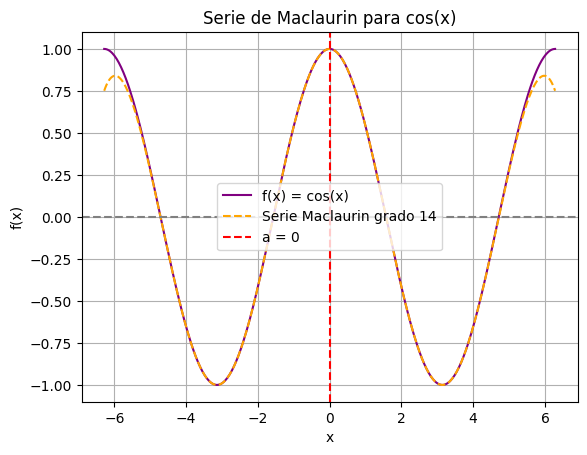

In [2]:
'''
El método de Maclaurin es un caso particular del polinomio de Taylor
donde el punto de expansión es a = 0.
'''

def maclaurin_cos(x_vals, n):
    """
    Serie de Maclaurin para cos(x).
    :param x_vals: Valores donde evaluar la serie
    :param n: Número de términos (grado)
    :return: Aproximación de cos(x) usando Maclaurin
    """
    resultado = 0
    for k in range(n + 1):
        signo = (-1)**k
        resultado += signo * (x_vals ** (2*k)) / math.factorial(2*k)
    return resultado

# Parámetros
grado = 7
x_vals = np.linspace(-2*np.pi, 2*np.pi, 400)
y_maclaurin_cos = maclaurin_cos(x_vals, grado)

# Gráfica
plt.plot(x_vals, np.cos(x_vals), label="f(x) = cos(x)", color='purple')
plt.plot(x_vals, y_maclaurin_cos, '--', label=f"Serie Maclaurin grado {2*grado}", color='orange')
plt.title("Serie de Maclaurin para cos(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="red", linestyle="--", label="a = 0")
plt.grid(True)
plt.legend()
plt.show()


### Polinomio de Lagrange

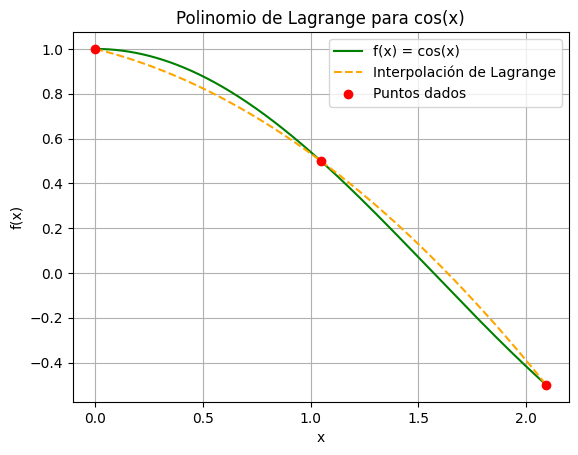

In [3]:

def lagrange_interpol(x_vals, x, y):
    """
    Interpolación de Lagrange para un conjunto de puntos dados.
    :param x_vals: Valores de x donde se evalúa el polinomio
    :param x: Valores conocidos de x
    :param y: Valores conocidos de y correspondientes a x_puntos
    :return: Aproximación interpolada en x_vals
    """
    n = len(x)
    resultado = 0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (x_vals - x[j]) / (x[i] - x[j])
        resultado += term
    return resultado

# Puntos conocidos para cos(x)
x_puntos = np.array([0, np.pi/3, 2*np.pi/3])
y_puntos = np.cos(x_puntos)

x_vals = np.linspace(0, 2*np.pi/3, 400)
y_lagrange = lagrange_interpol(x_vals, x_puntos, y_puntos)

# Gráfica
plt.plot(x_vals, np.cos(x_vals), label="f(x) = cos(x)", color='green')
plt.plot(x_vals, y_lagrange, '--', label="Interpolación de Lagrange", color='orange')
plt.scatter(x_puntos, y_puntos, color='red', zorder=5, label="Puntos dados")
plt.title("Polinomio de Lagrange para cos(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()
